### Heart Attack Analysis and prediction

## TASK = Analysis & Predict Heart Attack based on Age, Gender, No. of disease they have and some other aspects

### In this notebook I have implemented the above task. 
### I am a beginner in the field of Data Science. And used simple Machine Learning Algorithms to predict the Heart Attack among Patients considering various factors and information which is provided in the dataset.

### Feel free to share your thoughts and opinions.

In [ ]:
# Age : Age of the patient

# Sex : Sex of the patient

# exang: exercise induced angina (1 = yes; 0 = no)
# Angina: type of chest pain caused by reduced blood flow to the heart. 

# ca: number of major vessels (0-3)

# cp : Chest Pain type chest pain type

# Value 1: typical angina
# Value 2: atypical angina
# Value 3: non-anginal pain
# Value 4: asymptomatic

# trtbps : resting blood pressure (in mm Hg)

# chol : cholestoral in mg/dl fetched via BMI sensor

# fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

# rest_ecg : resting electrocardiographic results

# Value 0: normal
# Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

# thalach : maximum heart rate achieved

# target : 0= less chance of heart attack 1= more chance of heart attack

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
df1 = pd.read_csv('D:\Projects\Heart Attack Prediction-Task 8/heart.csv')

In [9]:
df1.sample(6)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0


In [11]:
df1.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
df1.duplicated().sum()

1

In [19]:
df1[df1.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [20]:
df1 = df1.drop_duplicates()

In [21]:
df1.duplicated().sum()

0

In [23]:
df1.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1


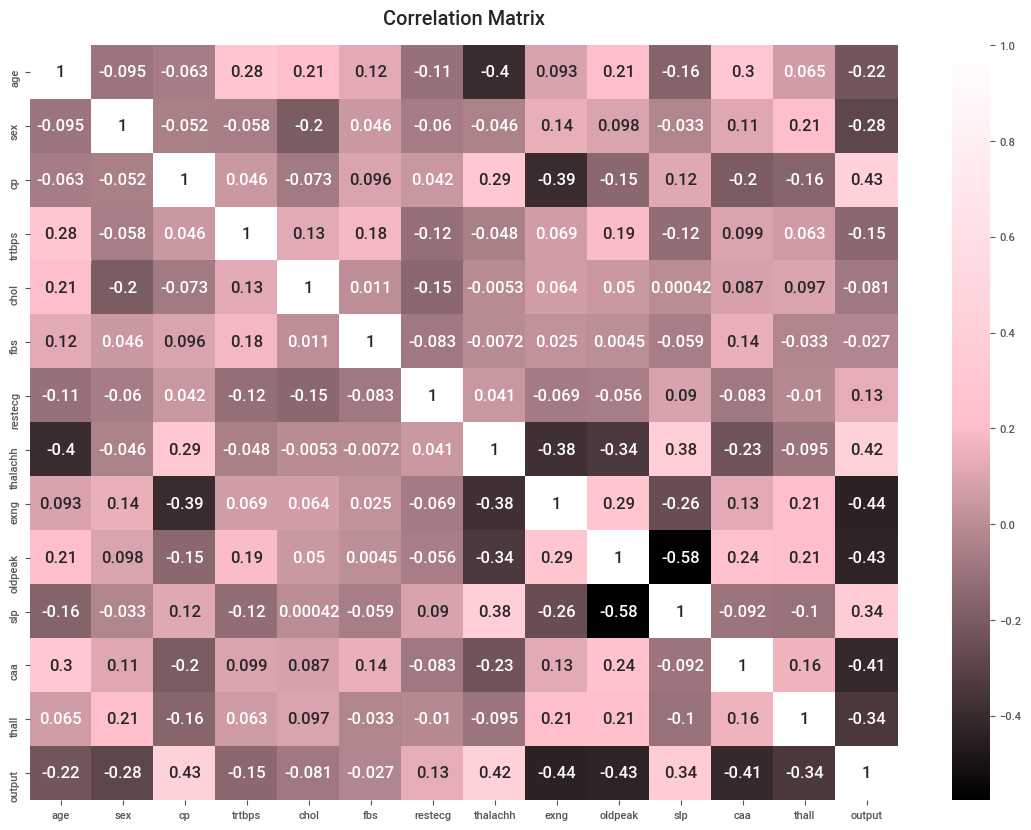

In [213]:
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["black", "pink", "w"], N=256) 
plt.figure(figsize = (14,10))
sns.heatmap(df1.corr(), cmap = cmap, annot = True)
plt.title('Correlation Matrix',pad = 15)
plt.show()

## From the Heatmap we find that  cp(Chest Pain type),  thalach(maximum heart rate achieved) positively correlated.
## Also exng(exercise induced angina) and oldpeak(depression induced by exercise relative to rest) are negatively correlated to the output

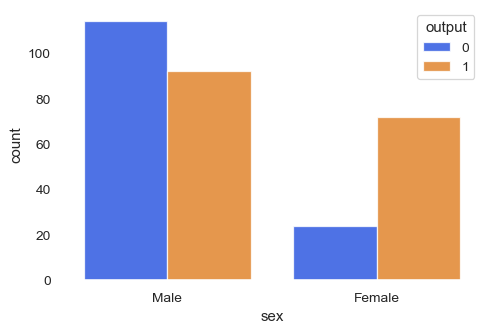

In [114]:
plt.figure(dpi = 90)
sex_data = df1.sex.map({1: 'Male', 0: 'Female'})
sns.countplot(sex_data, hue = df1.output, palette = 'bright', alpha = 0.8)
plt.show()

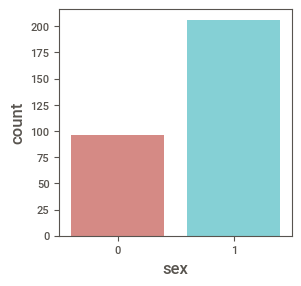

In [221]:
plt.figure(figsize = [3,3])
sns.countplot(df1.sex , palette = 'hls' , alpha = 0.8)
plt.show()

## here 0 : Female,  1 : Male

## We cant conclude that male patients are more than female patients as the total count of female patients is lesser than male patients

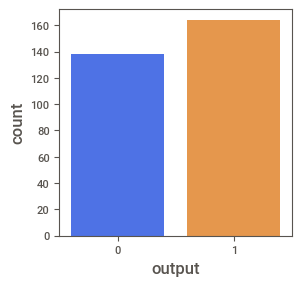

In [149]:
plt.figure(figsize = [3,3])
sns.countplot(df1.output ,palette = 'bright', alpha = 0.8)
plt.show()

In [129]:
df1['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
34     2
37     2
38     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [222]:
df1['chol'].value_counts()

234    6
204    6
197    6
212    5
254    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

In [ ]:
plt.figure(figsize = [3,3])
sns.countplot(df1.age ,palette = 'bright', alpha = 0.8)
plt.show()

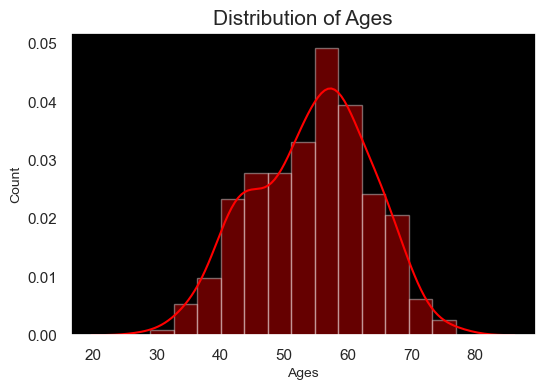

In [235]:
# Age
sns.set(rc = {'axes.facecolor': 'black', 'axes.grid': False,})

sns.distplot(df1['age'], color='red')
plt.title('Distribution of Ages', fontsize=15)
plt.xlabel('Ages', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

## From this plot we conclude that maximum heart attack patients are from the age of 45 to 65 (approximately).

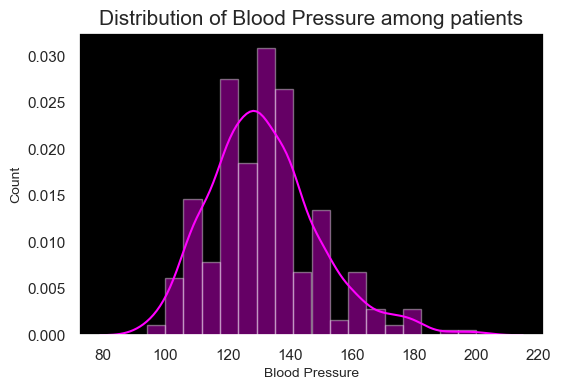

In [233]:
# Blood Pressure
sns.set(rc = {'axes.facecolor': 'black', 'axes.grid': False,})

sns.distplot(df1['trtbps'], color='magenta')
plt.title('Distribution of Blood Pressure among patients', fontsize=15)
plt.xlabel('Blood Pressure', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

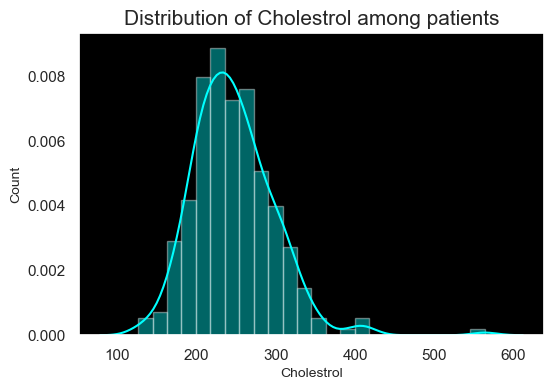

In [232]:
# Cholesterol rate
sns.distplot(df1['chol'], color='cyan')
plt.title('Distribution of Cholestrol among patients', fontsize=15)
plt.xlabel('Cholestrol', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

## Now Lets find relation of output with other columns

In [157]:
features = ['cp','fbs','restecg','exng','slp','caa','thall']

In [158]:
list(enumerate(features))

[(0, 'cp'),
 (1, 'fbs'),
 (2, 'restecg'),
 (3, 'exng'),
 (4, 'slp'),
 (5, 'caa'),
 (6, 'thall')]

In [108]:
df1['restecg'].value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

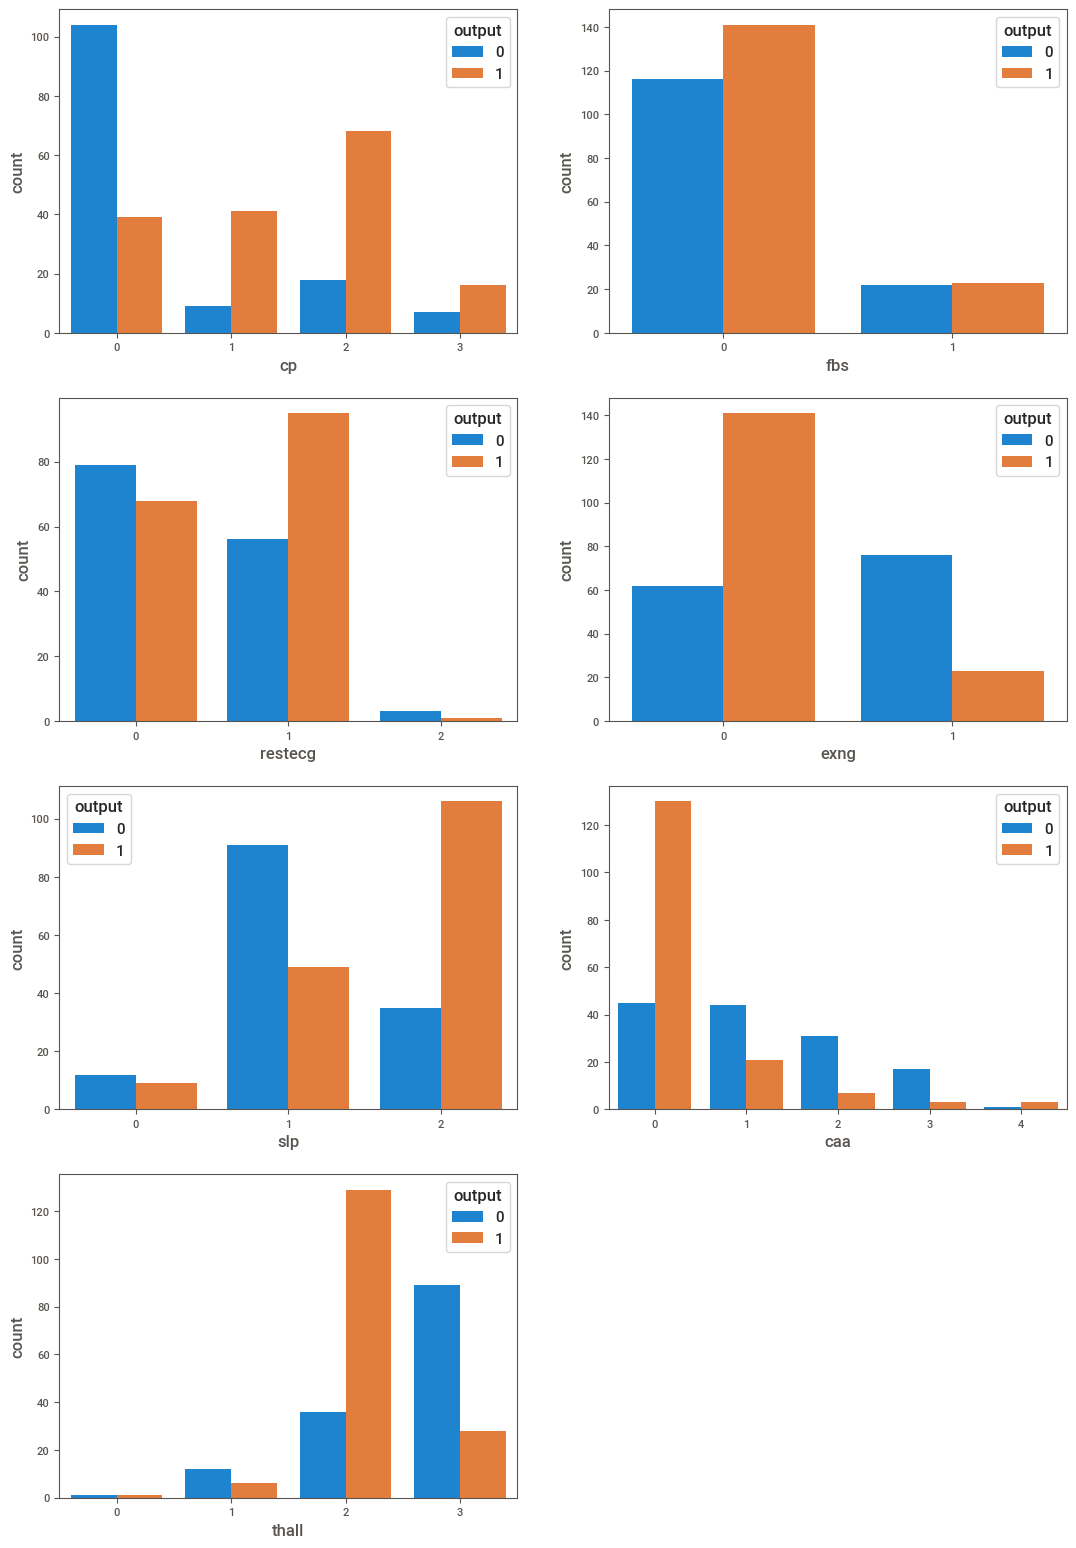

In [207]:
plt.figure(figsize = (13,30))
for i in enumerate(features):
    plt.subplot(6, 2, i[0]+1)
    sns.countplot(i[1], hue = 'output',data = df1)
plt.show()

## the people with maximum heart rate have more risk of heart attack - (thall) - maximum heart rate achieved

In [161]:
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [163]:
X = df1.iloc[: , :-1]
Y = df1.iloc[: , -1]

In [168]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = (0.3))


## Training Different ML models

In [193]:
# Hyperparameter Tuning
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
}

In [194]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

,model,best_score,best_params
0,svm,0.824474,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.806202,{'n_estimators': 10}
2,logistic_regression,0.833998,{'C': 10}


# logistic regression - best score

In [198]:
model_lg = LogisticRegression(solver='liblinear',multi_class='auto')
model_lg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [199]:
pred = model_lg.predict(x_test)
pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1], dtype=int64)

In [200]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [201]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , pred)
cm

array([[27, 11],
       [ 5, 48]], dtype=int64)

## Not the best result though...Lets find the other metrics also

In [203]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.8571428571428572

In [214]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8241758241758241

In [215]:
from sklearn.metrics import precision_score
precision_score(y_test, pred)

0.8135593220338984

In [216]:
from sklearn.metrics import recall_score
recall_score(y_test, pred)

0.9056603773584906